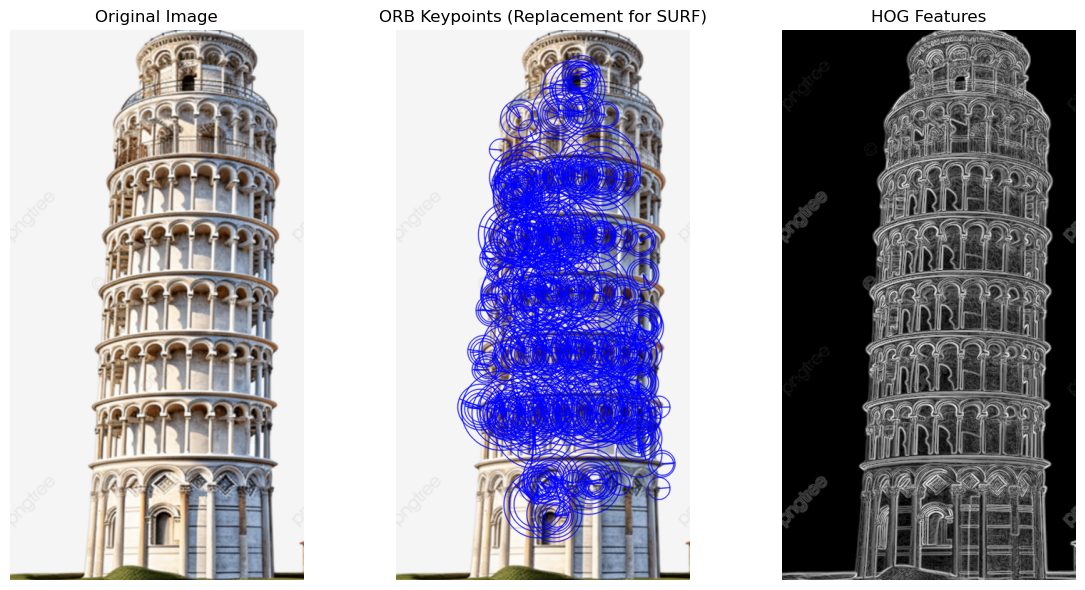

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('f1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Extract ORB features (as a replacement for SURF)
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

# Draw keypoints detected by ORB
image_orb = cv2.drawKeypoints(image, keypoints_orb, None, (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 2: Extract HOG features
hog = cv2.HOGDescriptor()
hog_features = hog.compute(gray)

# Since HOG is a descriptor, the features are not directly visualizable as an image.
# To visualize the HOG features, we can create a dummy visualization using gradient magnitudes
gradient_image = np.abs(np.gradient(gray.astype(float), axis=(0, 1)))
gradient_image = np.sqrt(gradient_image[0]*2 + gradient_image[1]*2)
gradient_image = np.clip(gradient_image / gradient_image.max() * 255, 0, 255).astype(np.uint8)

# Step 3: Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# ORB Keypoints
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_orb, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints (Replacement for SURF)")
plt.axis("off")

# HOG Visualization (gradient magnitudes)
plt.subplot(1, 3, 3)
plt.imshow(gradient_image, cmap='gray')
plt.title("HOG Features")
plt.axis("off")

plt.tight_layout()
plt.show()


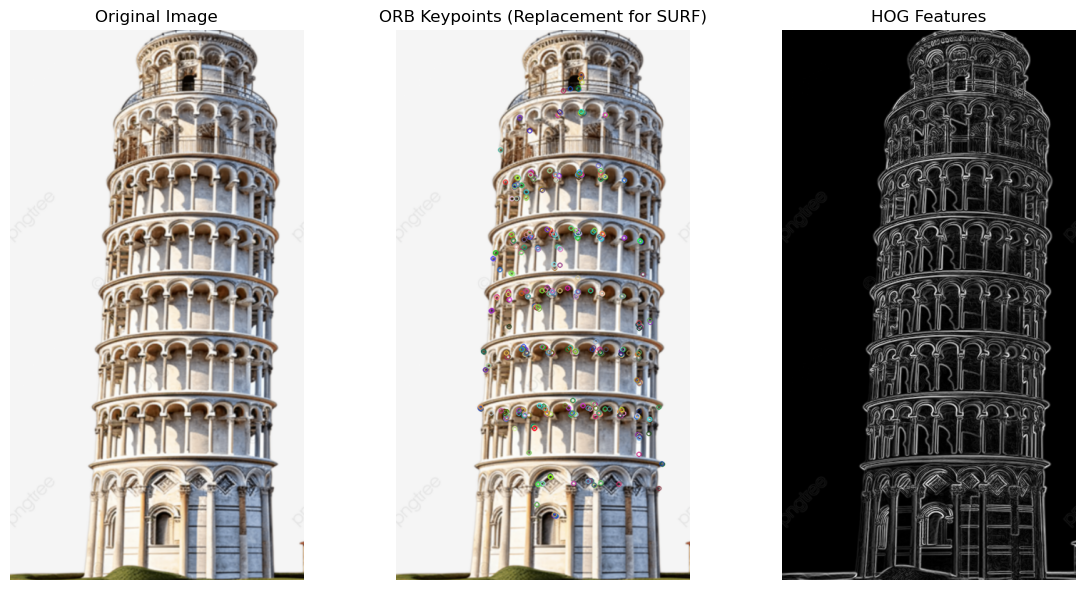

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('f1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Extract ORB features (as a replacement for SURF)
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(gray, None)

# Draw keypoints detected by ORB
image_orb = cv2.drawKeypoints(image, keypoints_orb, None, )

# Step 2: Extract HOG features
hog = cv2.HOGDescriptor()
hog_features = hog.compute(gray)

# Since HOG is a descriptor, the features are not directly visualizable as an image.
# To visualize the HOG features, we can create a dummy visualization using gradient magnitudes
# gradient_image = np.abs(np.gradient(gray.astype(float), axis=(0, 1)))
# gradient_image = np.sqrt(gradient_image[0]*2 + gradient_image[1]*2)
# gradient_image = np.clip(gradient_image / gradient_image.max() * 255, 0, 255).astype(np.uint8)

# Convert image to float for gradient calculation
gray_float = gray.astype(float)

# Calculate the gradient in both x and y directions
gradient_x, gradient_y = np.gradient(gray_float)

# Compute the magnitude of the gradient (Pythagorean theorem)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Normalize the gradient to 0-255 range
gradient_image = (gradient_magnitude / gradient_magnitude.max()) * 255

# Convert the result to an 8-bit unsigned integer
gradient_image = gradient_image.astype(np.uint8)


# Step 3: Display the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# ORB Keypoints
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_orb, cv2.COLOR_BGR2RGB))
plt.title("ORB Keypoints (Replacement for SURF)")
plt.axis("off")

# HOG Visualization (gradient magnitudes)
plt.subplot(1, 3, 3)
plt.imshow(gradient_image, cmap='gray')
plt.title("HOG Features")
plt.axis("off")

plt.tight_layout()
plt.show()
